# 1.1 

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import mglearn
from IPython.core.display import display 
from IPython.display import display
from sklearn.datasets import load_iris
#iris_dataset = load_iris()
import seaborn as sns

In [7]:
from sklearn.datasets import fetch_california_housing
#import plotly.plotly as py
from sklearn.model_selection import train_test_split

In [100]:
cal_housing = fetch_california_housing()
housing__data_df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
housing_target_df = pd.DataFrame(cal_housing.target,columns=["ln(Median House value)"])

In [101]:
print(cal_housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [102]:
cal_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [103]:
cal_housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

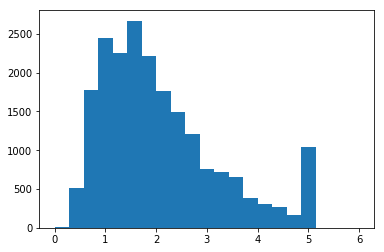

In [104]:
plt.hist(cal_housing.target, range=(0,6), bins = 21)
plt.show()

In [105]:
import seaborn as sns
print(min(cal_housing.target))
print(max(cal_housing.target))

0.14999
5.00001


Text(0.5,1,'Target value univariate distribution')

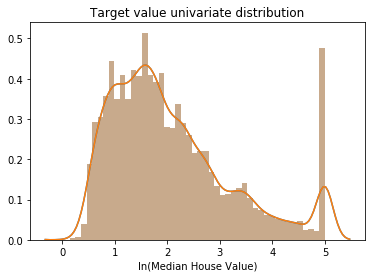

In [109]:
# Approximate probabilty distribution overlayed on a histogram of the target variable
sns.distplot(cal_housing.target)

ax = sns.distplot(cal_housing.target)
ax.set(xlabel='ln(Median House Value)')
ax.set_title('Target value univariate distribution')

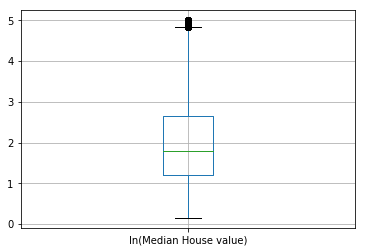

In [118]:
#box plot of the target variable
ax = housing_target_df.boxplot()

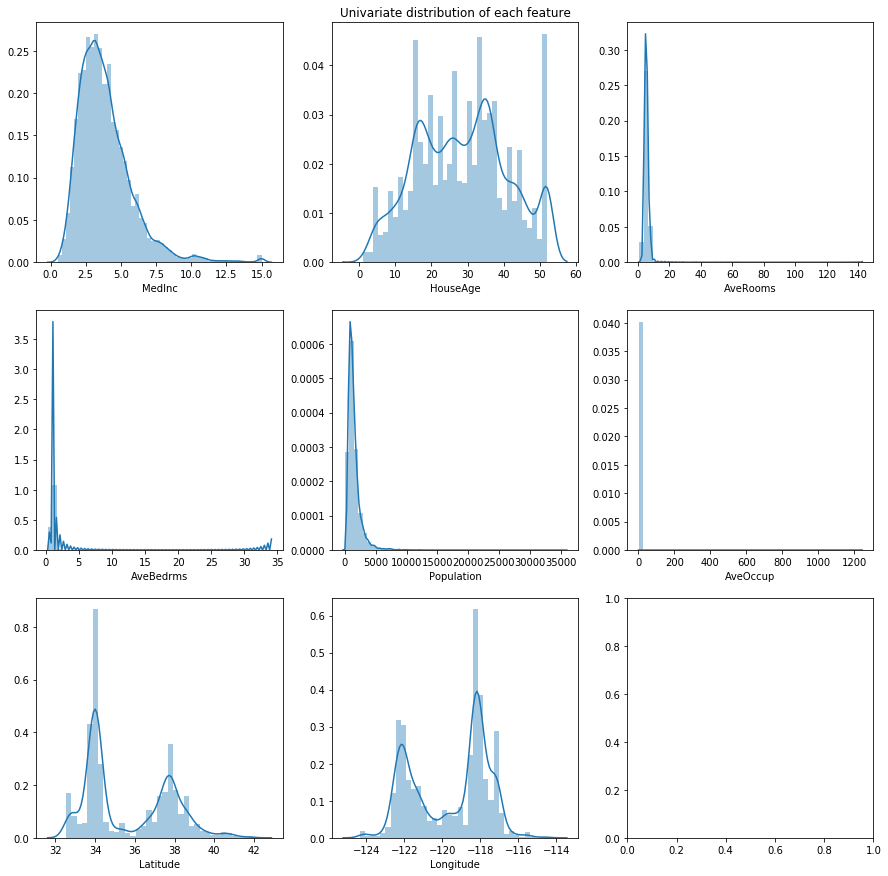

In [113]:
fig,ax = plt.subplots(3,3, figsize=(15,15)) 
k = 0
ax[0,1].set_title("Univariate distribution of each feature")
for i in range(3):
    for j in range(3):
        if i == 2 and j == 2:
            #sns.distplot(housing_target_df.iloc[:,0],ax = ax[i,j])
            break
        sns.distplot(housing__data_df.iloc[:,k],ax = ax[i,j])
        k +=1 

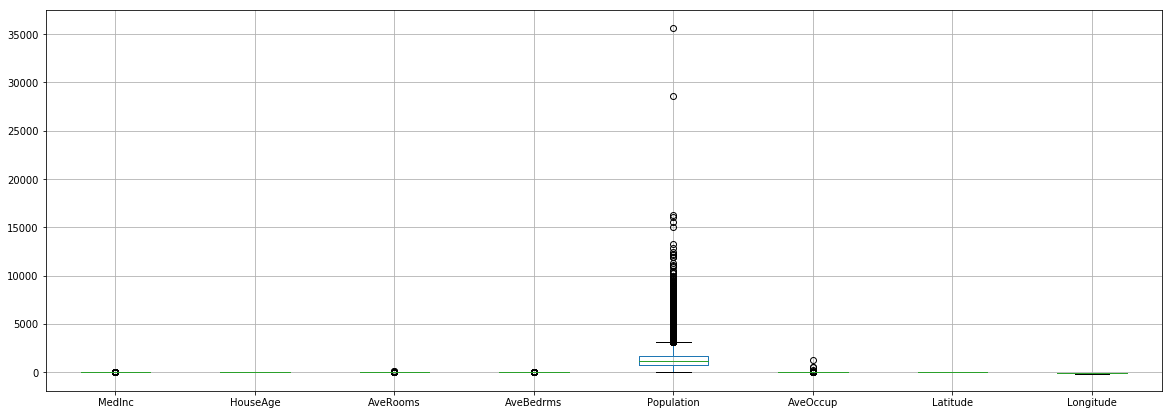

In [123]:
plt.figure(figsize=(20,7))
ax = housing__data_df.boxplot()

In [124]:
print(min(cal_housing.data[:,2]))
print(max(cal_housing.data[:,2]))

0.8461538461538461
141.9090909090909


# 1.1  Inferences 
1. The target variable is ln(median house value). From the distribution of the target we see that there is a spike at 5 which means that there is a disproportionately large number of housing units with value of the order of $100,000. We will have to be careful about this as the model might get biased towards this value.

2. There are several outliers in some features. For example in the average number of rooms, average number of bedrooms, average number of occupants seem to bunch up between certain values. But then there are massive outliers. Because of their large magnitude, these outliers could also skew the model's output

3. Also, the lattitde and longitude plots of the centroids of the blocks is bimodal. This means that housing units in California are predominantly clustered at 2 locations in the state 

# 1.2 
Scatter plot of all features vs target variable (ln(Median House Value))

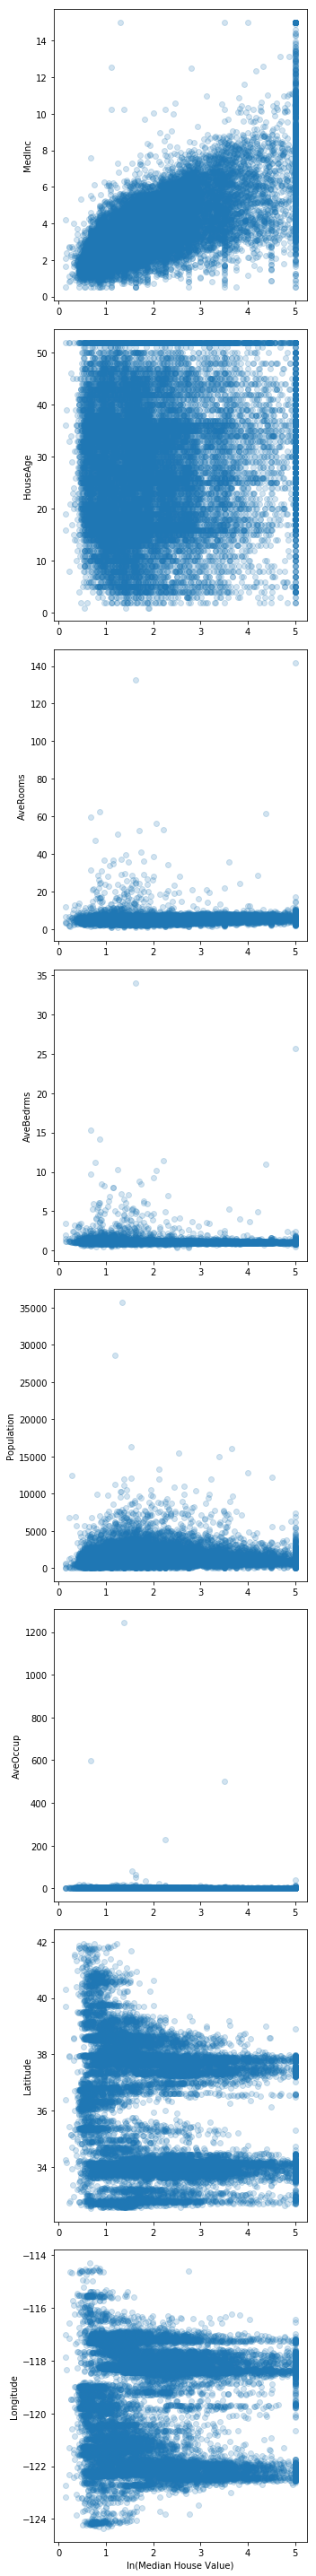

In [127]:
fig,ax = plt.subplots(8,1, figsize=(5,40))

for i in range(8):
    ax[i].scatter(cal_housing.target,cal_housing.data[:,i], alpha = 0.2)
    ax[i].set_ylabel(cal_housing.feature_names[i])

ax[7].set_xlabel('ln(Median House Value)')

plt.tight_layout()

plt.show()

# 1.3

In [128]:
#1.3
#Never call fit on anything test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data, cal_housing.target, random_state=42)

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

In [130]:
lr = LinearRegression()
rr = Ridge()
ls = Lasso()
en = ElasticNet()

In [131]:
lr.fit(X_train, y_train)
rr.fit(X_train, y_train)
ls.fit(X_train, y_train)
en.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
print("Linear Regression mean cross val score is:{:.3f}".format(np.mean(cross_val_score(lr, X_train, y_train))))
print("Ridge Regression mean cross val score is:{:.3f}".format(np.mean(cross_val_score(rr, X_train, y_train))))
print("Lasso Regression mean cross val score is:{:.3f}".format(np.mean(cross_val_score(ls, X_train, y_train))))
print("Elastic Net mean cross val score is:{:.3f}".format(np.mean(cross_val_score(en, X_train, y_train))))

Linear Regression mean cross val score is:0.608
Ridge Regression mean cross val score is:0.608
Lasso Regression mean cross val score is:0.287
Elastic Net mean cross val score is:0.424


In [28]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_scaled = Ridge().fit(X_train_scaled, y_train)
linear_scaled = LinearRegression().fit(X_train_scaled, y_train)
elastic_scaled = ElasticNet().fit(X_train_scaled, y_train)
lasso_scaled = Lasso().fit(X_train_scaled, y_train)



print("Scaled Linear Regression score is:{:.3f}".format(linear_scaled.score(X_test_scaled,y_test)))
print("Scaled Ridge Regression score is:{:.3f}".format(ridge_scaled.score(X_test_scaled,y_test)))
print("Scaled Lasso Regression score is:{:.3f}".format(lasso_scaled.score(X_test_scaled,y_test)))
print("Scaled ElasticNet Regression score is:{:.3f}".format(elastic_scaled.score(X_test_scaled,y_test)))

Scaled Linear Regression score is:0.591
Scaled Ridge Regression score is:0.591
Scaled Lasso Regression score is:-0.000
Scaled ElasticNet Regression score is:0.204


In [40]:
print("Scaled Linear Regression mean cross val score is:{:.3f}".format(np.mean(cross_val_score(linear_scaled, X_train_scaled, y_train))))
print("Scaled Ridge Regression mean cross val score is:{:.3f}".format(np.mean(cross_val_score(ridge_scaled, X_train_scaled, y_train))))
print("Scaled Lasso Regression mean cross val score is:{:.3f}".format(np.mean(cross_val_score(lasso_scaled, X_train_scaled, y_train))))
print("Scaled Elastic Regression mean cross val score is:{:.3f}".format(np.mean(cross_val_score(elastic_scaled, X_train_scaled, y_train))))

Scaled Linear Regression mean cross val score is:0.608
Scaled Ridge Regression mean cross val score is:0.608
Scaled Lasso Regression mean cross val score is:-0.000
Scaled Elastic Regression mean cross val score is:0.206


# 1.3 Inferences
There is no improvement in Linear Regression and Ridge. However, for the case of Lasso and Elastic Net the mean cross val score goes down. Thus scaling in this case does not help.

# 1.4

In [133]:
from sklearn.model_selection import GridSearchCV

In [142]:
#For Lasso
param_grid_lasso = {'alpha': np.logspace(-8, 2, 30)}
print(param_grid_lasso)

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, return_train_score=True)
grid_lasso.fit(X_train, y_train)
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)
print("test-set score: {:.3f}".format(grid_lasso.score(X_test, y_test)))
pd.DataFrame(grid_lasso.cv_results_)


{'alpha': array([1.00000000e-08, 2.21221629e-08, 4.89390092e-08, 1.08263673e-07,
       2.39502662e-07, 5.29831691e-07, 1.17210230e-06, 2.59294380e-06,
       5.73615251e-06, 1.26896100e-05, 2.80721620e-05, 6.21016942e-05,
       1.37382380e-04, 3.03919538e-04, 6.72335754e-04, 1.48735211e-03,
       3.29034456e-03, 7.27895384e-03, 1.61026203e-02, 3.56224789e-02,
       7.88046282e-02, 1.74332882e-01, 3.85662042e-01, 8.53167852e-01,
       1.88739182e+00, 4.17531894e+00, 9.23670857e+00, 2.04335972e+01,
       4.52035366e+01, 1.00000000e+02])}
{'alpha': 0.00013738237958832637}
0.6081916093875163
test-set score: 0.591


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.081641,0.002720,0.608191,0.610151,1e-08,{'alpha': 1e-08},13,0.607549,0.610921,0.619933,0.604033,0.597091,0.615499,0.009390,2.594336e-03,0.009336,0.004712
1,0.094287,0.000884,0.608191,0.610151,2.21222e-08,{'alpha': 2.2122162910704503e-08},12,0.607549,0.610921,0.619933,0.604033,0.597091,0.615499,0.013639,6.453470e-06,0.009336,0.004712
2,0.118962,0.000962,0.608191,0.610151,4.8939e-08,{'alpha': 4.893900918477499e-08},11,0.607549,0.610921,0.619933,0.604033,0.597091,0.615499,0.019644,1.047712e-04,0.009336,0.004712
3,0.080485,0.001157,0.608191,0.610151,1.08264e-07,{'alpha': 1.0826367338740541e-07},10,0.607549,0.610921,0.619933,0.604033,0.597091,0.615499,0.003972,3.854676e-04,0.009336,0.004712
4,0.080049,0.001716,0.608191,0.610151,2.39503e-07,{'alpha': 2.395026619987486e-07},9,0.607549,0.610921,0.619933,0.604033,0.597091,0.615499,0.004778,1.158085e-03,0.009336,0.004712
5,0.085413,0.007360,0.608191,0.610151,5.29832e-07,{'alpha': 5.298316906283712e-07},8,0.607549,0.610921,0.619933,0.604033,0.597091,0.615499,0.005925,8.870706e-03,0.009336,0.004712
6,0.091002,0.003409,0.608191,0.610151,1.1721e-06,{'alpha': 1.1721022975334793e-06},7,0.607548,0.610921,0.619932,0.604033,0.597091,0.615499,0.020156,3.540131e-03,0.009336,0.004712
7,0.070520,0.000890,0.608191,0.610151,2.59294e-06,{'alpha': 2.592943797404667e-06},6,0.607548,0.610921,0.619932,0.604033,0.597092,0.615499,0.006103,1.129969e-05,0.009335,0.004712
8,0.065768,0.000882,0.608191,0.610151,5.73615e-06,{'alpha': 5.736152510448681e-06},5,0.607548,0.610921,0.619931,0.604033,0.597094,0.615499,0.004247,4.566751e-06,0.009334,0.004712
9,0.061042,0.000889,0.608191,0.610151,1.26896e-05,{'alpha': 1.2689610031679234e-05},4,0.607547,0.610921,0.619928,0.604033,0.597097,0.615499,0.006816,9.898121e-06,0.009332,0.004712


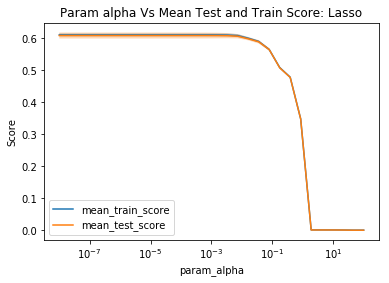

In [143]:
resultsLasso = pd.DataFrame(grid_lasso.cv_results_)

#Plotting Param_alpha vs Mean Test and Mean Train Score 
resultsLasso.plot('param_alpha', 'mean_train_score')
resultsLasso.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(resultsLasso.param_alpha.astype(np.float),
                 resultsLasso['mean_train_score'] + resultsLasso['std_train_score'],
                 resultsLasso['mean_train_score'] - resultsLasso['std_train_score'], alpha=0.3)
plt.fill_between(resultsLasso.param_alpha.astype(np.float),
                 resultsLasso['mean_test_score'] + resultsLasso['std_test_score'],
                 resultsLasso['mean_test_score'] - resultsLasso['std_test_score'], alpha=0.3)
plt.legend()
plt.title("Param alpha Vs Mean Test and Train Score: Lasso")
plt.ylabel("Score")
plt.xscale("log")
plt.savefig("Lasso_1.png")
plt.show()

In [144]:
# For ElasticNet
param_grid_en = {'alpha': np.logspace(-7, -1, 10),
              'l1_ratio': [ 1.2, 1.5, 3, 5, 100]}
grid_en = GridSearchCV(ElasticNet(), param_grid_en, cv=10, return_train_score=True)
grid_en.fit(X_train, y_train)
print(grid_en.best_params_)
print(grid_en.best_score_)
print("test-set score: {:.3f}".format(grid_en.score(X_test, y_test)))
pd.DataFrame(grid_en.cv_results_)

# import pandas as pd
# res = pd.pivot_table(pd.DataFrame(grid.cv_results_),
#     values='mean_test_score', index='param_alpha', columns='param_l1_ratio')

{'alpha': 1e-05, 'l1_ratio': 100}
0.6062663507014436
test-set score: 0.591


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.110256,0.000973,0.606259,0.609977,1e-07,1.2,"{'alpha': 1e-07, 'l1_ratio': 1.2}",26,0.610474,0.609773,...,0.571816,0.613336,0.601821,0.610724,0.599496,0.611014,0.006248,0.000454,0.019700,0.002101
1,0.107550,0.000806,0.606259,0.609977,1e-07,1.5,"{'alpha': 1e-07, 'l1_ratio': 1.5}",25,0.610474,0.609773,...,0.571816,0.613336,0.601821,0.610724,0.599496,0.611014,0.000410,0.000031,0.019700,0.002101
2,0.103927,0.001526,0.606259,0.609977,1e-07,3,"{'alpha': 1e-07, 'l1_ratio': 3}",24,0.610474,0.609773,...,0.571816,0.613336,0.601821,0.610724,0.599496,0.611014,0.001546,0.002153,0.019700,0.002101
3,0.100268,0.000853,0.606259,0.609977,1e-07,5,"{'alpha': 1e-07, 'l1_ratio': 5}",21,0.610474,0.609773,...,0.571816,0.613336,0.601821,0.610724,0.599496,0.611014,0.000429,0.000199,0.019700,0.002101
4,0.082261,0.000795,0.606259,0.609977,1e-07,100,"{'alpha': 1e-07, 'l1_ratio': 100}",12,0.610473,0.609773,...,0.571819,0.613336,0.601822,0.610724,0.599495,0.611014,0.000581,0.000022,0.019698,0.002101
5,0.099651,0.000788,0.606259,0.609977,4.64159e-07,1.2,"{'alpha': 4.641588833612782e-07, 'l1_ratio': 1.2}",23,0.610474,0.609773,...,0.571816,0.613336,0.601821,0.610724,0.599496,0.611014,0.000476,0.000010,0.019700,0.002101
6,0.098435,0.000809,0.606259,0.609977,4.64159e-07,1.5,"{'alpha': 4.641588833612782e-07, 'l1_ratio': 1.5}",22,0.610474,0.609773,...,0.571816,0.613336,0.601821,0.610724,0.599496,0.611014,0.000458,0.000039,0.019700,0.002101
7,0.094226,0.000790,0.606259,0.609977,4.64159e-07,3,"{'alpha': 4.641588833612782e-07, 'l1_ratio': 3}",20,0.610473,0.609773,...,0.571816,0.613336,0.601821,0.610724,0.599496,0.611014,0.000376,0.000014,0.019699,0.002101
8,0.092383,0.000791,0.606259,0.609977,4.64159e-07,5,"{'alpha': 4.641588833612782e-07, 'l1_ratio': 5}",17,0.610473,0.609773,...,0.571817,0.613336,0.601821,0.610724,0.599496,0.611014,0.004192,0.000010,0.019699,0.002101
9,0.073196,0.000787,0.606259,0.609977,4.64159e-07,100,"{'alpha': 4.641588833612782e-07, 'l1_ratio': 100}",7,0.610469,0.609773,...,0.571832,0.613336,0.601827,0.610724,0.599493,0.611014,0.000425,0.000009,0.019694,0.002101


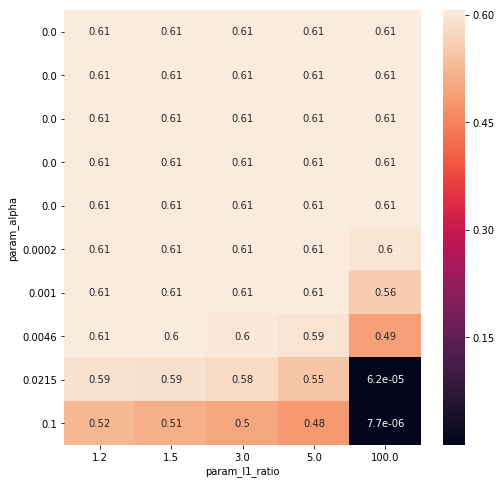

In [150]:
res = pd.pivot_table(pd.DataFrame(grid_en.cv_results_),
                     values='mean_test_score', index='param_alpha', columns='param_l1_ratio')

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax = ax, data = res, annot=True)
ax.set_yticklabels(np.round(param_grid_en['alpha'],4))
plt.show()


In [173]:
# For Ridge
param_grid_rr = {'alpha': np.logspace(-2, 3, 30)}
print(param_grid_rr)

grid_rr = GridSearchCV(Ridge(), param_grid_rr, return_train_score=True)
grid_rr.fit(X_train, y_train)

print(grid_rr.best_params_)
print(grid_rr.best_score_)
print("test-set score: {:.3f}".format(grid_rr.score(X_test, y_test)))
pd.DataFrame(grid_rr.cv_results_)


{'alpha': array([1.00000000e-02, 1.48735211e-02, 2.21221629e-02, 3.29034456e-02,
       4.89390092e-02, 7.27895384e-02, 1.08263673e-01, 1.61026203e-01,
       2.39502662e-01, 3.56224789e-01, 5.29831691e-01, 7.88046282e-01,
       1.17210230e+00, 1.74332882e+00, 2.59294380e+00, 3.85662042e+00,
       5.73615251e+00, 8.53167852e+00, 1.26896100e+01, 1.88739182e+01,
       2.80721620e+01, 4.17531894e+01, 6.21016942e+01, 9.23670857e+01,
       1.37382380e+02, 2.04335972e+02, 3.03919538e+02, 4.52035366e+02,
       6.72335754e+02, 1.00000000e+03])}
{'alpha': 2.592943797404667}
0.6081924379983338
test-set score: 0.591


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.007420,0.001136,0.608191,0.610151,0.01,{'alpha': 0.01},17,0.607549,0.610921,0.619933,0.604033,0.597091,0.615499,0.003117,0.000402,0.009336,0.004712
1,0.003237,0.000863,0.608191,0.610151,0.0148735,{'alpha': 0.014873521072935119},16,0.607549,0.610921,0.619932,0.604033,0.597091,0.615499,0.000049,0.000038,0.009336,0.004712
2,0.003141,0.000838,0.608191,0.610151,0.0221222,{'alpha': 0.022122162910704492},15,0.607548,0.610921,0.619932,0.604033,0.597092,0.615499,0.000040,0.000010,0.009336,0.004712
3,0.003463,0.000947,0.608191,0.610151,0.0329034,{'alpha': 0.03290344562312668},14,0.607548,0.610921,0.619932,0.604033,0.597092,0.615499,0.000165,0.000074,0.009335,0.004712
4,0.003400,0.000965,0.608191,0.610151,0.048939,{'alpha': 0.04893900918477494},13,0.607548,0.610921,0.619932,0.604033,0.597092,0.615499,0.000143,0.000079,0.009335,0.004712
5,0.003237,0.000978,0.608191,0.610151,0.0727895,{'alpha': 0.07278953843983153},12,0.607548,0.610921,0.619931,0.604033,0.597093,0.615499,0.000088,0.000178,0.009335,0.004712
6,0.003168,0.000841,0.608191,0.610151,0.108264,{'alpha': 0.10826367338740546},11,0.607548,0.610921,0.619930,0.604033,0.597095,0.615499,0.000025,0.000010,0.009334,0.004712
7,0.003176,0.000868,0.608191,0.610151,0.161026,{'alpha': 0.16102620275609392},10,0.607547,0.610921,0.619929,0.604033,0.597096,0.615499,0.000028,0.000047,0.009332,0.004712
8,0.003190,0.000834,0.608191,0.610151,0.239503,{'alpha': 0.2395026619987486},9,0.607547,0.610921,0.619927,0.604033,0.597099,0.615499,0.000029,0.000011,0.009330,0.004712
9,0.008133,0.001429,0.608191,0.610151,0.356225,{'alpha': 0.35622478902624444},8,0.607546,0.610921,0.619924,0.604033,0.597103,0.615499,0.000583,0.000241,0.009328,0.004712


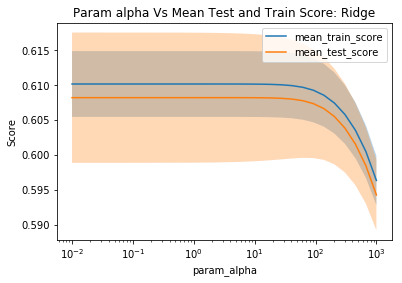

In [174]:
resultsRidge = pd.DataFrame(grid_rr.cv_results_)

#Plotting Param_alpha vs Mean Test and Mean Train Score 
resultsRidge.plot('param_alpha', 'mean_train_score')
resultsRidge.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(resultsRidge.param_alpha.astype(np.float),
                 resultsRidge['mean_train_score'] + resultsRidge['std_train_score'],
                 resultsRidge['mean_train_score'] - resultsRidge['std_train_score'], alpha=0.3)
plt.fill_between(resultsRidge.param_alpha.astype(np.float),
                 resultsRidge['mean_test_score'] + resultsRidge['std_test_score'],
                 resultsRidge['mean_test_score'] - resultsRidge['std_test_score'], alpha=0.3)
plt.legend()
plt.title("Param alpha Vs Mean Test and Train Score: Ridge")
plt.ylabel("Score")
plt.xscale("log")
plt.savefig("Ridge_1.png")
plt.show()

# 1.5

In [175]:
grid_rr.best_estimator_.coef_

array([ 4.47141672e-01,  9.57239325e-03, -1.23889506e-01,  7.89627880e-01,
       -1.42768907e-06, -3.44174434e-03, -4.18546175e-01, -4.33334838e-01])

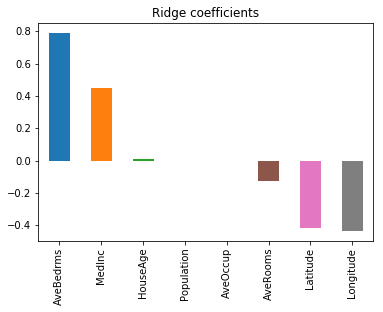

AveBedrms     0.789628
MedInc        0.447142
HouseAge      0.009572
Population   -0.000001
AveOccup     -0.003442
AveRooms     -0.123890
Latitude     -0.418546
Longitude    -0.433335
dtype: float64


In [182]:
ridge = grid_rr.best_estimator_ 
ridge_coef = pd.Series(ridge.coef_,housing__data_df.columns).sort_values(ascending=False)
ridge_coef.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.title("Ridge coefficients")
plt.show()
print (ridge_coef)

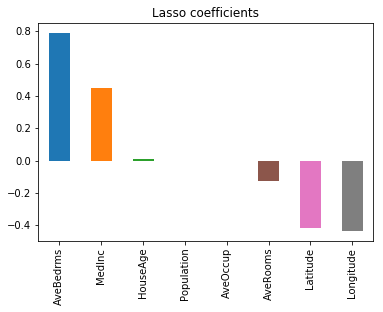

AveBedrms     0.788690
MedInc        0.447054
HouseAge      0.009576
Population   -0.000001
AveOccup     -0.003441
AveRooms     -0.123712
Latitude     -0.418385
Longitude    -0.433150
dtype: float64


In [181]:
lasso = grid_lasso.best_estimator_
lasso_coef = pd.Series(lasso.coef_,housing__data_df.columns).sort_values(ascending=False)
lasso_coef.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.title("Lasso coefficients")
plt.show()
print (lasso_coef)

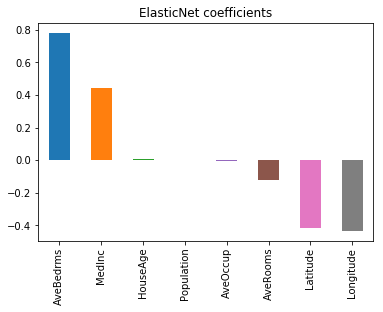

AveBedrms     0.780693
MedInc        0.446304
HouseAge      0.009598
Population   -0.000001
AveOccup     -0.003434
AveRooms     -0.122219
Latitude     -0.417381
Longitude    -0.431973
dtype: float64


In [183]:
elastic_net =grid_en.best_estimator_
elastic_net_coef = pd.Series(elastic_net.coef_,housing__data_df.columns).sort_values(ascending=False)
elastic_net_coef.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.title("ElasticNet coefficients")
plt.show()
print (elastic_net_coef)

# 1.5 Inferences
The coefficients seem to agree on which features are important. All three models have high coefficients (in terms of magnitude) for the first 2 and the last 2 features while the middle ones are close to 0 

# 2.1

In [14]:
from sklearn.datasets import fetch_covtype

In [15]:
data = fetch_covtype()

In [16]:
print(data.DESCR)

Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.



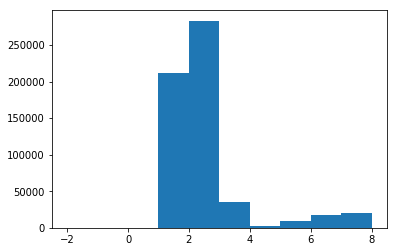

In [17]:
plt.hist(data.target, bins=range(-2,9))
plt.show()
#The target values are discrete integers representing the type of forest cover
#Thus, a majority of the values are either type 1 or 2 forest cover

In [18]:
titles = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area','Soil_Type']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

In [20]:
import pandas as pd

cov_df = pd.DataFrame(data.data)

In [21]:
target_df = pd.DataFrame(data.target)
target_df.head
data.data.shape
#data.feature_names

(581012, 54)

- Here we observe that the data contains 2 features that are represented in 4 and 40 columns respectively in one hot encoded fashion. Thus in essence the data has 12 features, represented across 54 columns. 

- Given the large dimensionality of the data, we will convert the one hot representation to a numerical category representation that occupies just one column per feature. 

- This will reduce the dimensionality of the dataset and vastly improve computation time to fit our machine learning models  

In [22]:
wild_df = cov_df[cov_df.columns[10:14]]
#wild_df.head
#wild_df.shape

In [24]:
soil_df = cov_df[cov_df.columns[14:54]]
#soil_df.head
#soil_df.shape

In [25]:
print(wild_df.sum().sum())
print(soil_df.sum().sum())

581012.0
581012.0


This means that the columns for wilderness area and soil type are one hot. We can convert them into a numerical categorical columns

In [26]:
# Compressing all those columns into a single columns for the wilderness and soil type categories
x_wild = wild_df.stack()
wild_col = pd.Series(pd.Categorical(x_wild[x_wild!=0].index.get_level_values(1)))

x_soil = soil_df.stack()
soil_col = pd.Series(pd.Categorical(x_soil[x_soil!=0].index.get_level_values(1)))

In [27]:
soil_col_i = soil_col.cat.codes
wild_col_i = wild_col.cat.codes

In [28]:
new_cov_data = cov_df[cov_df.columns[0:10]]
new_cov_data.head
#cov_df.head
new_cov_data[10] = wild_col_i
new_cov_data[11] = soil_col_i

/home/adi/.conda/envs/stuff/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/adi/.conda/envs/stuff/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
#This is the new dataset
new_cov_data.head

<bound method NDFrame.head of             0      1     2      3      4       5      6      7      8   \
0       2596.0   51.0   3.0  258.0    0.0   510.0  221.0  232.0  148.0   
1       2590.0   56.0   2.0  212.0   -6.0   390.0  220.0  235.0  151.0   
2       2804.0  139.0   9.0  268.0   65.0  3180.0  234.0  238.0  135.0   
3       2785.0  155.0  18.0  242.0  118.0  3090.0  238.0  238.0  122.0   
4       2595.0   45.0   2.0  153.0   -1.0   391.0  220.0  234.0  150.0   
5       2579.0  132.0   6.0  300.0  -15.0    67.0  230.0  237.0  140.0   
6       2606.0   45.0   7.0  270.0    5.0   633.0  222.0  225.0  138.0   
7       2605.0   49.0   4.0  234.0    7.0   573.0  222.0  230.0  144.0   
8       2617.0   45.0   9.0  240.0   56.0   666.0  223.0  221.0  133.0   
9       2612.0   59.0  10.0  247.0   11.0   636.0  228.0  219.0  124.0   
10      2612.0  201.0   4.0  180.0   51.0   735.0  218.0  243.0  161.0   
11      2886.0  151.0  11.0  371.0   26.0  5253.0  234.0  240.0  136.0   
12      

In [34]:
final_data = np.array(new_cov_data)
final_target = np.array(data.target)

<function matplotlib.pyplot.show>

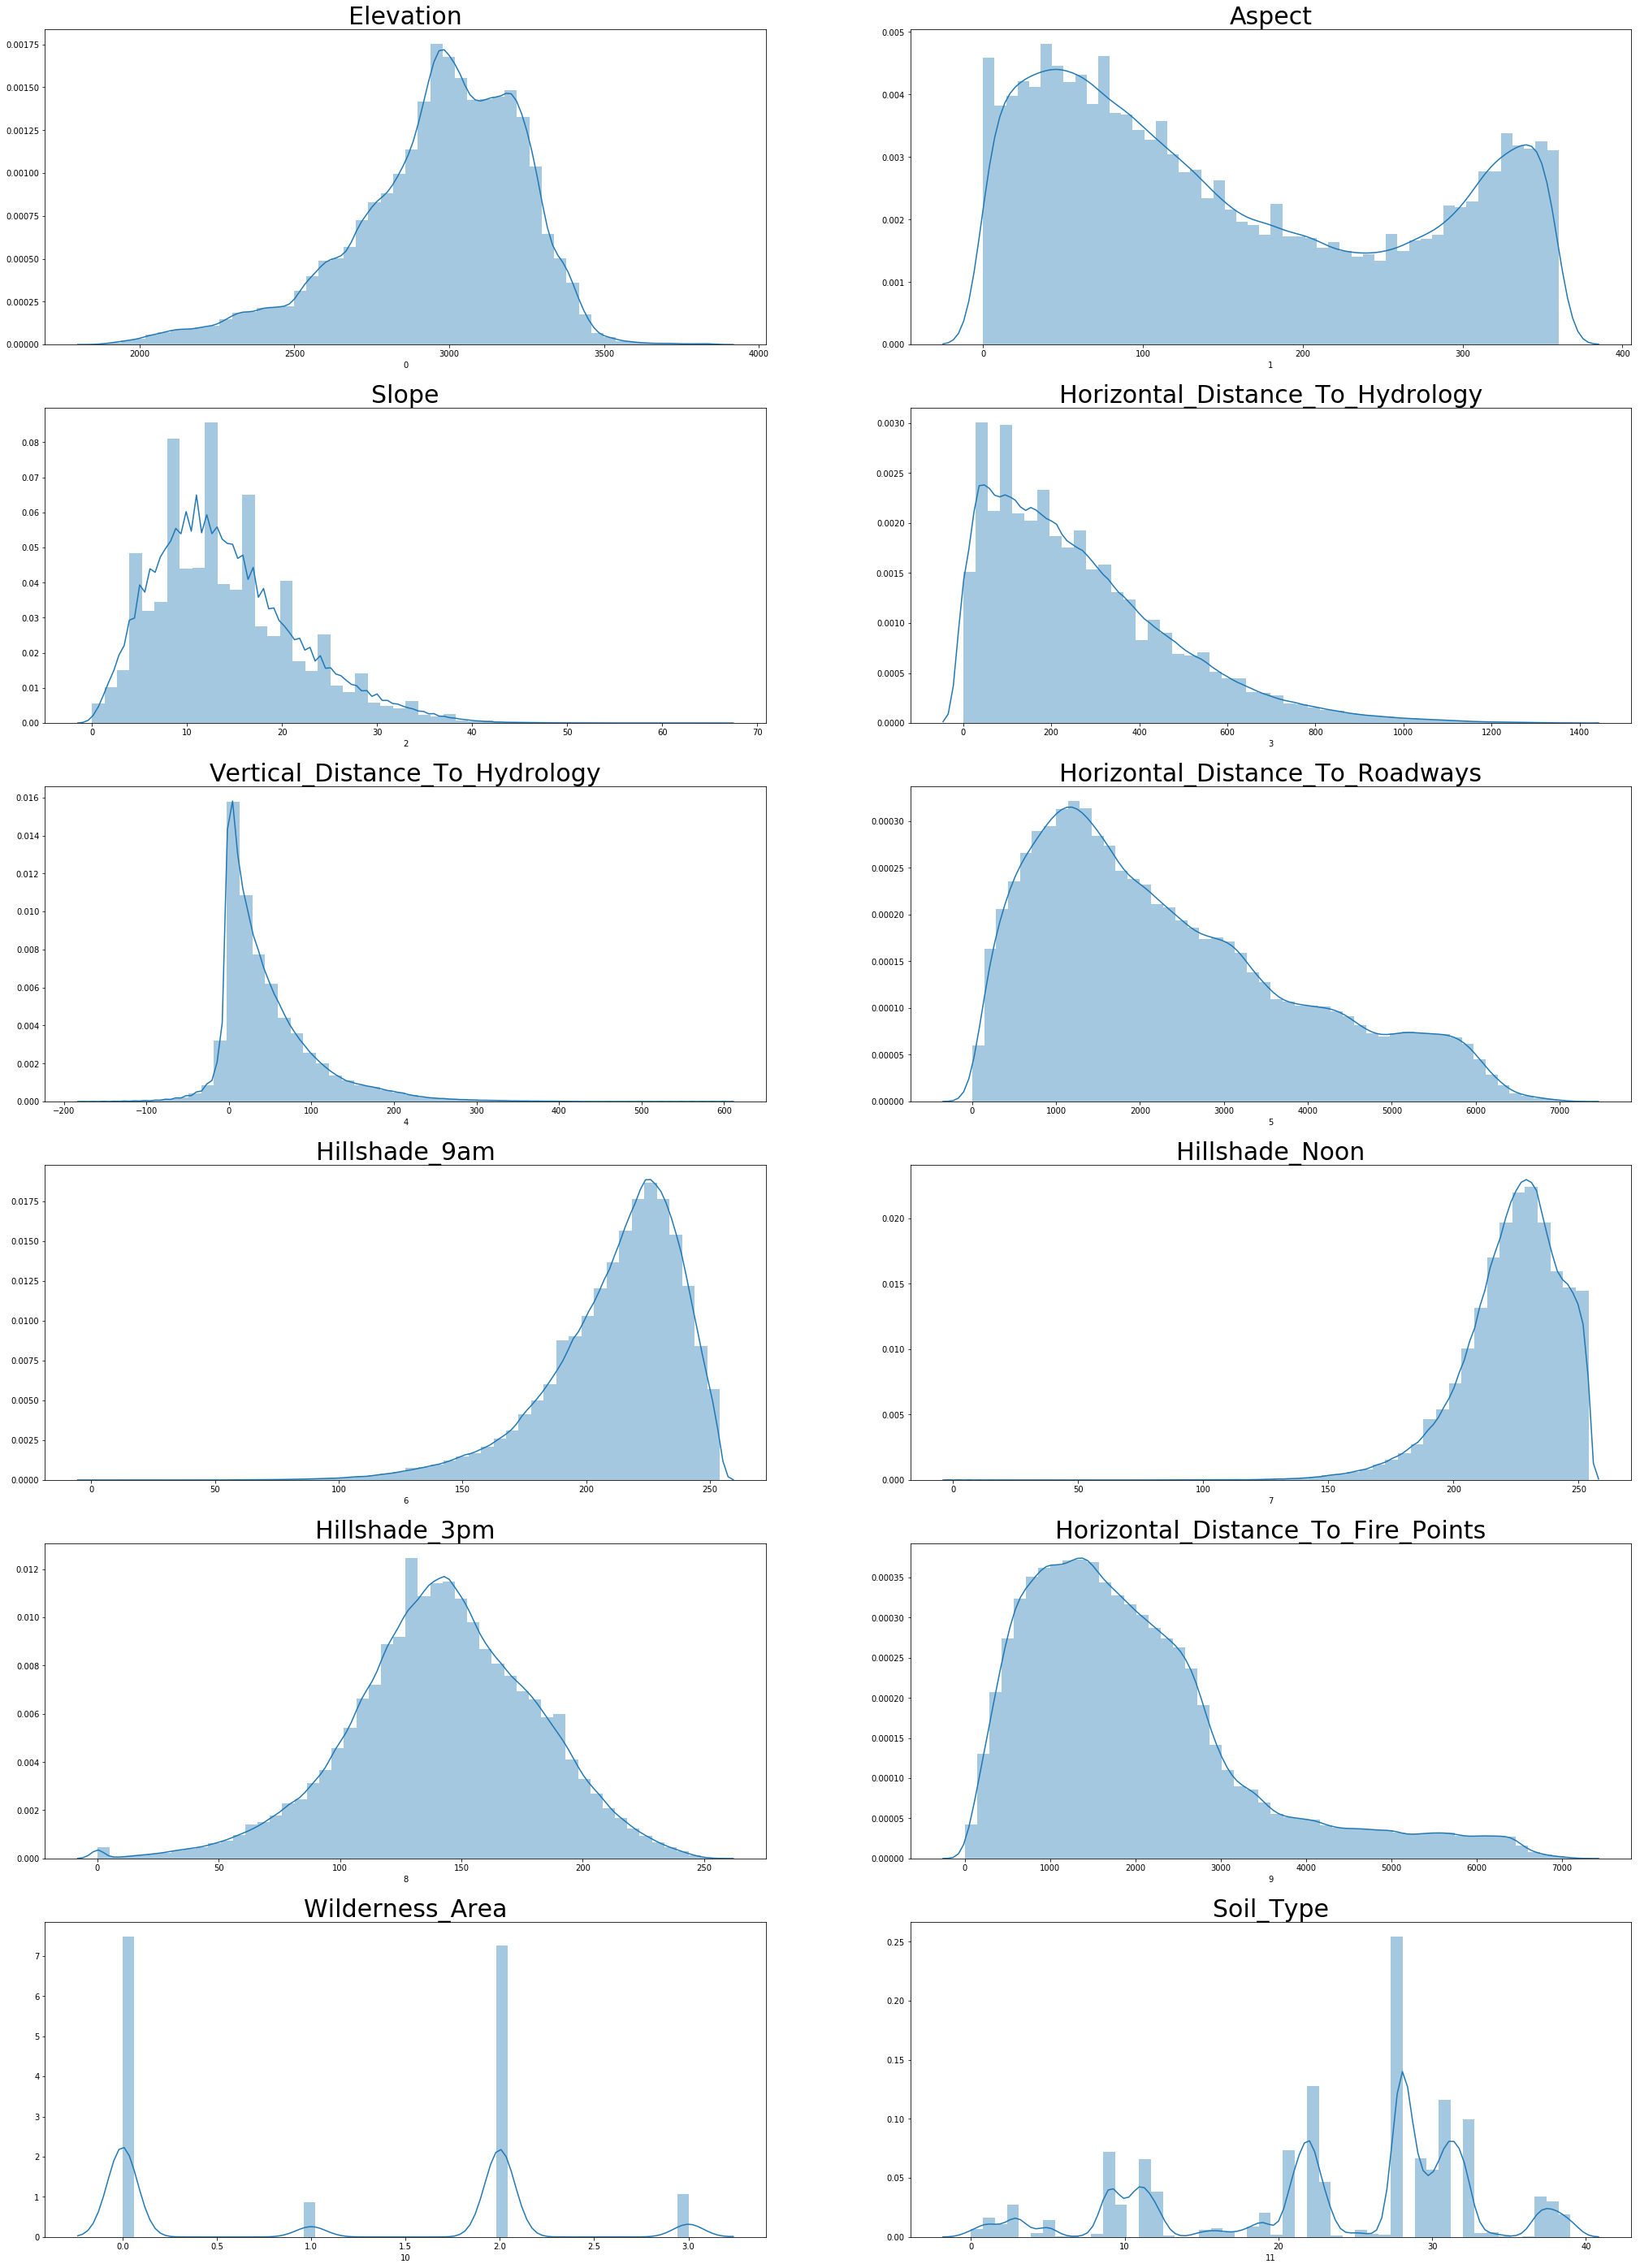

In [33]:
#Plotting univariate distribution of each feature:
fig,ax = plt.subplots(6,2, figsize=(35,50)) #initiating 3*3 grid of plots 
k = 0
for i in range(6):
    for j in range(2):
        if(i+j<54):
            #print(i,j)
            sns.distplot(new_cov_data.iloc[:,k],ax = ax[i,j])
            ax[i,j].set_title(titles[k], fontsize = 30)
            k+=1
            
plt.show
        

# 2.2

In [35]:
X_train, X_test, y_train, y_test = train_test_split(new_cov_data, data.target, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC 
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [37]:
lr = LogisticRegression(multi_class='multinomial', dual=False, solver='lbfgs', tol=0.001,penalty = 'l2')
svc = LinearSVC(dual=False,tol=0.001)
nc = NearestCentroid()

In [237]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.001, verbose=0, warm_start=False)

In [238]:
lr.score(X_test,y_test)

0.6225688970279444

In [239]:
print("Logistic Regression mean cross val score is:{:.3f}".format(np.mean(cross_val_score(lr, X_train, y_train))))

Logistic Regression mean cross val score is:0.621


# Logistic Regression mean cross val score is: 0.621

In [240]:
svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)

In [241]:
print("LSVC cross val score is:{:.3f}".format(np.mean(cross_val_score(svc, X_train, y_train))))

Logistic Regression meanfrom sklearn.model_selection import cross_val_score cross val score is:0.682


# Linear SVC mean cross val score is 0.682

In [242]:
nc.fit(X_train,y_train)
nc.score(X_test,y_test)
print("Nearest Centroid cross val score is:{:.3f}".format(np.mean(cross_val_score(nc, X_train, y_train))))

Nearest Centroid cross val score is:0.193


# Nearest Centroid cross val score is 0.193

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [244]:
nc.fit(X_train_scaled,y_train)
print(nc.score(X_test_scaled,y_test))
print("Nearest Centroid cross val score is:{:.3f}".format(np.mean(cross_val_score(nc, X_train_scaled, y_train))))

0.5491315153559652
Nearest Centroid cross val score is:0.551


# Scaled nearest centroid cross val score is 0.551

In [245]:
lr.fit(X_train_scaled,y_train)
print(lr.score(X_test_scaled,y_test))
print("Logistic Regression scaled cross val score is:{:.3f}".format(np.mean(cross_val_score(lr, X_train_scaled, y_train))))

0.7235237826413223
Logistic Regression scaled cross val score is:0.725


# Scaled Logistic Regression cross val score is 0.725

In [246]:
svc = LinearSVC(dual=False,tol=0.001)
svc.fit(X_train_scaled,y_train)
print(svc.score(X_test_scaled,y_test))
print("Linear SVC scaled cross val score is:{:.3f}".format(np.mean(cross_val_score(svc, X_train_scaled, y_train))))

0.7118200656785058
Linear SVC scaled cross val score is:0.713


# Scaled Linear SVC has a cross val score of 0.713

Thus we see that scaling in this case greatly improves performance across all models

# 2.3 

In [40]:
lr = LogisticRegression(multi_class='multinomial', dual=False, solver='lbfgs', tol=0.001,penalty = 'l2')
svc = LinearSVC(dual=False,tol=0.001)
nc = NearestCentroid()

In [248]:
#For Logistic
param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid_log)

grid_log = GridSearchCV(lr, param_grid_log, cv=3,return_train_score=True)
grid_log.fit(X_train_scaled, y_train)
print(grid_log.best_params_)
print(grid_log.best_score_)
print("test-set score: {:.3f}".format(grid_log.score(X_test, y_test)))
pd.DataFrame(grid_log.cv_results_)


{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
{'C': 1}
0.724639078022485
test-set score: 0.035


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,29.076655,0.041096,0.717153,0.717250,0.001,{'C': 0.001},6,0.715144,0.718633,0.718250,0.716801,0.718065,0.716315,0.088193,0.000168,0.001423,0.000998
1,29.081047,0.041083,0.723361,0.723628,0.01,{'C': 0.01},5,0.721616,0.725098,0.723868,0.723231,0.724599,0.722556,0.494750,0.000173,0.001270,0.001075
2,29.000674,0.041134,0.724439,0.724598,0.1,{'C': 0.1},4,0.722635,0.725882,0.725245,0.724305,0.725439,0.723606,0.266838,0.000128,0.001279,0.000952
3,29.418955,0.041865,0.724639,0.724724,1,{'C': 1},1,0.722944,0.726220,0.725355,0.724357,0.725618,0.723595,0.413541,0.000497,0.001203,0.001102
4,28.815740,0.041269,0.724488,0.724652,10,{'C': 10},3,0.722579,0.725989,0.725286,0.724381,0.725597,0.723585,0.335162,0.000113,0.001355,0.001000
5,28.898816,0.041290,0.724536,0.724651,100,{'C': 100},2,0.722607,0.725741,0.725334,0.724495,0.725666,0.723716,0.408313,0.000101,0.001371,0.000834


# Logistic GridSearchCV crossval score = 0.7246

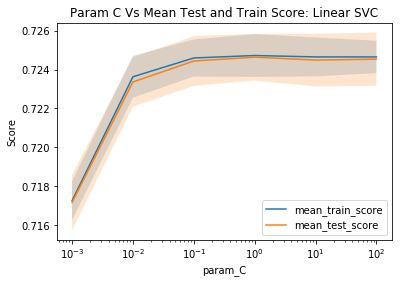

In [249]:
resultsSVC = pd.DataFrame(grid_log.cv_results_)

#Plotting Param_C vs Mean Test and Mean Train Score 
resultsSVC.plot('param_C', 'mean_train_score')
resultsSVC.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(resultsSVC.param_C.astype(np.float),
                 resultsSVC['mean_train_score'] + resultsSVC['std_train_score'],
                 resultsSVC['mean_train_score'] - resultsSVC['std_train_score'], alpha=0.2)
plt.fill_between(resultsSVC.param_C.astype(np.float),
                 resultsSVC['mean_test_score'] + resultsSVC['std_test_score'],
                 resultsSVC['mean_test_score'] - resultsSVC['std_test_score'], alpha=0.2)
plt.legend()
plt.title("Param C Vs Mean Test and Train Score: Linear SVC")
plt.ylabel("Score")
plt.xscale("log")
plt.savefig("SVC_C_search.png")

In [250]:
param_grid_svc = {'C': [0.01, 0.1, 1, 10, 100]}
print(param_grid_svc)

grid_svc = GridSearchCV(svc, param_grid_svc, cv=3,return_train_score=True)
grid_svc.fit(X_train_scaled, y_train)
print(grid_svc.best_params_)
print(grid_svc.best_score_)
print("test-set score: {:.3f}".format(grid_log.score(X_test, y_test)))
pd.DataFrame(grid_svc.cv_results_)

{'C': [0.01, 0.1, 1, 10, 100]}
{'C': 100}
0.712995027067714
test-set score: 0.035


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,40.619946,0.045045,0.712607,0.712806,0.01,{'C': 0.01},5,0.711131,0.713872,0.713727,0.712460,0.712964,0.712085,0.985982,0.000120,0.001090,0.000770
1,43.882228,0.049659,0.712894,0.713116,0.1,{'C': 0.1},4,0.711351,0.714051,0.714106,0.712887,0.713225,0.712408,1.907639,0.004585,0.001149,0.000690
2,46.147295,0.048477,0.712974,0.713205,1,{'C': 1},3,0.711420,0.714110,0.714250,0.712994,0.713253,0.712511,0.625881,0.004917,0.001172,0.000669
3,43.369499,0.042441,0.712986,0.713212,10,{'C': 10},2,0.711413,0.714113,0.714264,0.713015,0.713281,0.712508,1.553033,0.001814,0.001182,0.000670
4,40.699773,0.041363,0.712995,0.713208,100,{'C': 100},1,0.711427,0.714113,0.714271,0.713011,0.713287,0.712501,0.813153,0.000136,0.001179,0.000673


# Linear SVC GridSearchCV crossval score = 0.713

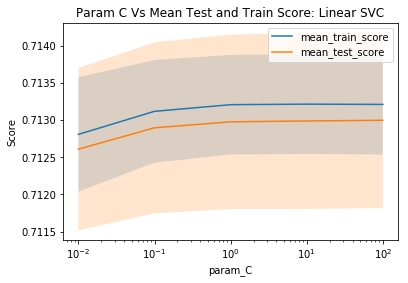

In [251]:
resultsSVC = pd.DataFrame(grid_svc.cv_results_)

#Plotting Param_C vs Mean Test and Mean Train Score 
resultsSVC.plot('param_C', 'mean_train_score')
resultsSVC.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(resultsSVC.param_C.astype(np.float),
                 resultsSVC['mean_train_score'] + resultsSVC['std_train_score'],
                 resultsSVC['mean_train_score'] - resultsSVC['std_train_score'], alpha=0.2)
plt.fill_between(resultsSVC.param_C.astype(np.float),
                 resultsSVC['mean_test_score'] + resultsSVC['std_test_score'],
                 resultsSVC['mean_test_score'] - resultsSVC['std_test_score'], alpha=0.2)
plt.legend()
plt.title("Param C Vs Mean Test and Train Score: Linear SVC")
plt.ylabel("Score")
plt.xscale("log")
plt.savefig("SVC_C_search.png")

In [252]:
param_grid_nc = {'shrink_threshold': [0.01, 0.1, 1, 10, 15, 20, 30]}
print(param_grid_nc)

grid_nc = GridSearchCV(nc, param_grid_nc, cv=3,return_train_score=True)
grid_nc.fit(X_train_scaled, y_train)
print(grid_nc.best_params_)
print(grid_nc.best_score_)
print("test-set score: {:.3f}".format(grid_nc.score(X_test, y_test)))
pd.DataFrame(grid_nc.cv_results_)

{'shrink_threshold': [0.01, 0.1, 1, 10, 15, 20, 30]}
{'shrink_threshold': 30}
0.5589626376047311
test-set score: 0.035


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_shrink_threshold,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.397976,0.060052,0.551376,0.551454,0.01,{'shrink_threshold': 0.01},2,0.552349,0.552345,0.550433,0.552047,0.551346,0.549969,0.005823,0.001202,0.000783,0.001057
1,0.387522,0.059354,0.551094,0.551230,0.1,{'shrink_threshold': 0.1},3,0.551977,0.552242,0.550371,0.551841,0.550933,0.549608,0.002159,0.000063,0.000666,0.001159
2,0.385272,0.059292,0.548810,0.548910,1,{'shrink_threshold': 1},4,0.549747,0.550376,0.548230,0.549369,0.548454,0.546985,0.001064,0.000135,0.000668,0.001422
3,0.386101,0.059396,0.546203,0.546406,10,{'shrink_threshold': 10},5,0.548879,0.550049,0.544299,0.544595,0.545432,0.544575,0.000618,0.000101,0.001948,0.002576
4,0.387029,0.059496,0.545421,0.545627,15,{'shrink_threshold': 15},6,0.549141,0.549416,0.544595,0.545114,0.542527,0.542352,0.000525,0.000080,0.002763,0.002907
5,0.386321,0.059520,0.525396,0.525667,20,{'shrink_threshold': 20},7,0.528577,0.529127,0.525077,0.525717,0.522534,0.522156,0.001251,0.000059,0.002478,0.002846
6,0.385360,0.059437,0.558963,0.559076,30,{'shrink_threshold': 30},1,0.563240,0.564101,0.556663,0.556157,0.556985,0.556971,0.000910,0.000124,0.003027,0.003568


# Nearest Centroid GridSearchCV crossval score = 0.5590

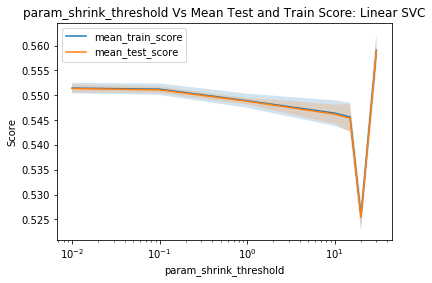

In [253]:
resultsSVC = pd.DataFrame(grid_nc.cv_results_)

#Plotting Param_C vs Mean Test and Mean Train Score 
resultsSVC.plot('param_shrink_threshold', 'mean_train_score')
resultsSVC.plot('param_shrink_threshold', 'mean_test_score', ax=plt.gca())
plt.fill_between(resultsSVC.param_shrink_threshold.astype(np.float),
                 resultsSVC['mean_train_score'] + resultsSVC['std_train_score'],
                 resultsSVC['mean_train_score'] - resultsSVC['std_train_score'], alpha=0.2)
plt.fill_between(resultsSVC.param_shrink_threshold.astype(np.float),
                 resultsSVC['mean_test_score'] + resultsSVC['std_test_score'],
                 resultsSVC['mean_test_score'] - resultsSVC['std_test_score'], alpha=0.2)
plt.legend()
plt.title("param_shrink_threshold Vs Mean Test and Train Score: Linear SVC")
plt.ylabel("Score")
plt.xscale("log")
plt.savefig("NC_Shrink_search.png")

# 2.3 Inference
The results improve marginally across all models

# 2.4 

In [39]:
from sklearn.model_selection import KFold

In [53]:
lr = LogisticRegression(multi_class='multinomial', dual=False, solver='lbfgs', tol=0.001,penalty = 'l2')
svc = LinearSVC(dual=False,tol=0.001)
nc = NearestCentroid()


#For Logistic Reg kfold with suffling
kf = KFold(random_state=42, shuffle=True)
param_grid_log_k = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
#print(param_grid_log)

grid_log_k = GridSearchCV(lr, param_grid_log_k, cv=kf,return_train_score=True)
grid_log_k.fit(X_train_scaled, y_train)
print(grid_log_k.best_params_)
print(grid_log_k.best_score_)
print("test-set score: {:.3f}".format(grid_log_k.score(X_test, y_test)))
pd.DataFrame(grid_log_k.cv_results_)



{'C': 100}
0.712848156894063
test-set score: 0.035


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,21.833268,0.025275,0.703607,0.703750,0.001,{'C': 0.001},6,0.702189,0.704309,0.704137,0.703256,0.704495,0.703686,0.903785,0.001194,0.001013,0.000432
1,27.863673,0.031512,0.711189,0.711265,0.01,{'C': 0.01},5,0.711228,0.711514,0.711531,0.710932,0.710808,0.711348,2.850477,0.004285,0.000296,0.000245
2,34.449810,0.028380,0.712410,0.712561,0.1,{'C': 0.1},4,0.712591,0.712715,0.712701,0.712268,0.711937,0.712701,7.287304,0.003473,0.000337,0.000208
3,41.092303,0.038548,0.712761,0.712863,1,{'C': 1},2,0.712784,0.712915,0.713128,0.712770,0.712371,0.712904,5.502200,0.008068,0.000310,0.000066
4,26.131343,0.028135,0.712731,0.712856,10,{'C': 10},3,0.712688,0.712870,0.713225,0.712805,0.712281,0.712894,1.326362,0.004354,0.000386,0.000038
5,29.507956,0.026700,0.712848,0.712969,100,{'C': 100},1,0.712825,0.712977,0.713231,0.712805,0.712488,0.713125,4.979909,0.003717,0.000304,0.000131


In [256]:
#For Logistic Reg
kf2 = KFold(random_state = 69, shuffle=True)
param_grid_log_k = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid_log)

grid_log_k2 = GridSearchCV(lr, param_grid_log_k, cv=kf2,return_train_score=True)
grid_log_k2.fit(X_train_scaled, y_train)
print(grid_log_k2.best_params_)
print(grid_log_k2.best_score_)
print("test-set score: {:.3f}".format(grid_log_k2.score(X_test, y_test)))
pd.DataFrame(grid_log_k2.cv_results_)



{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
{'C': 10}
0.7244072985296919
test-set score: 0.035


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,30.072226,0.042308,0.717142,0.717286,0.001,{'C': 0.001},6,0.717114,0.716804,0.718037,0.717651,0.716274,0.717403,0.088983,0.001444,0.000720,0.000355
1,31.021530,0.040394,0.723473,0.723609,0.01,{'C': 0.01},5,0.723421,0.723472,0.724143,0.723682,0.722856,0.723672,0.317856,0.000527,0.000527,0.000097
2,30.041317,0.041713,0.724302,0.724640,0.1,{'C': 0.1},4,0.724467,0.724192,0.724784,0.724859,0.723655,0.724870,0.601721,0.002799,0.000476,0.000317
3,30.923120,0.042781,0.724368,0.724671,1,{'C': 1},2,0.724570,0.724281,0.724694,0.724791,0.723840,0.724942,0.558064,0.003935,0.000377,0.000283
4,32.835261,0.047059,0.724407,0.724676,10,{'C': 10},1,0.724612,0.724271,0.724722,0.724846,0.723889,0.724911,2.632823,0.001386,0.000369,0.000288
5,31.217964,0.043628,0.724322,0.724582,100,{'C': 100},3,0.724508,0.724309,0.724756,0.724653,0.723703,0.724784,1.436789,0.002614,0.000450,0.000200


In [257]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data.data, data.target, random_state=15)
scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_scaled2 = scaler.transform(X_train_new)
X_test_scaled2 = scaler.transform(X_test_new)


#For Logistic Reg
kf2 = KFold(random_state = 69, shuffle=True)
param_grid_log_k = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid_log)

grid_log_k3 = GridSearchCV(lr, param_grid_log_k, cv=kf2,return_train_score=True)
grid_log_k3.fit(X_train_scaled2, y_train)
print(grid_log_k3.best_params_)
print(grid_log_k3.best_score_)
print("test-set score: {:.3f}".format(grid_log_k3.score(X_test_scaled2, y_test)))
pd.DataFrame(grid_log_k3.cv_results_)



{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
{'C': 0.001}
0.48769618068703113
test-set score: 0.487


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,20.861054,0.066085,0.487696,0.487717,0.001,{'C': 0.001},1,0.488582,0.487281,0.486654,0.488241,0.487852,0.487628,4.036085,0.014898,0.000795,0.000397
1,43.702918,0.048747,0.487694,0.487718,0.01,{'C': 0.01},2,0.488575,0.487281,0.486654,0.488241,0.487852,0.487632,5.323226,0.007660,0.000792,0.000397
2,36.384584,0.050653,0.487689,0.487720,0.1,{'C': 0.1},6,0.488561,0.487288,0.486654,0.488241,0.487852,0.487632,4.897679,0.007568,0.000787,0.000394
3,47.457972,0.066360,0.487692,0.487720,1,{'C': 1},3,0.488568,0.487288,0.486654,0.488241,0.487852,0.487632,4.250118,0.002985,0.000790,0.000394
4,43.852257,0.051847,0.487692,0.487720,10,{'C': 10},3,0.488568,0.487288,0.486654,0.488241,0.487852,0.487632,0.865037,0.014389,0.000790,0.000394
5,39.041423,0.045560,0.487692,0.487720,100,{'C': 100},3,0.488568,0.487288,0.486654,0.488241,0.487852,0.487632,2.479182,0.007661,0.000790,0.000394


In [43]:


#For SVC
kf = KFold(random_state=42, shuffle=True)
param_grid_svc_k = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid_svc_k)

grid_svc_k = GridSearchCV(svc, param_grid_svc_k, cv=kf,return_train_score=True)
grid_svc_k.fit(X_train_scaled, y_train)
print(grid_svc_k.best_params_)
print(grid_svc_k.best_score_)
pd.DataFrame(grid_svc_k.cv_results_)



{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
{'C': 100}
0.6703613694725754


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,6.330540,0.023263,0.665818,0.666040,0.001,{'C': 0.001},6,0.666127,0.667198,0.665639,0.665291,0.665687,0.665632,0.181139,0.001055,0.000220,0.000830
1,7.293080,0.023419,0.669916,0.670025,0.01,{'C': 0.01},5,0.670451,0.671132,0.669935,0.669305,0.669363,0.669638,0.229430,0.000902,0.000444,0.000795
2,6.814825,0.022848,0.670240,0.670335,0.1,{'C': 0.1},4,0.670754,0.671404,0.670382,0.669628,0.669583,0.669972,0.158889,0.000599,0.000488,0.000769
3,6.694203,0.022097,0.670336,0.670506,1,{'C': 1},3,0.670809,0.671583,0.670540,0.669804,0.669659,0.670131,0.363865,0.000167,0.000491,0.000773
4,6.867768,0.022683,0.670359,0.670531,10,{'C': 10},2,0.670836,0.671604,0.670575,0.669835,0.669666,0.670155,0.295216,0.000790,0.000502,0.000770
5,10.836142,0.037767,0.670361,0.670532,100,{'C': 100},1,0.670843,0.671604,0.670575,0.669835,0.669666,0.670158,1.584833,0.003729,0.000504,0.000769


In [44]:
#For SVC
kf2 = KFold(random_state=69, shuffle=True)
param_grid_svc_k = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid_svc_k)

grid_svc_k2 = GridSearchCV(svc, param_grid_svc_k, cv=kf,return_train_score=True)
grid_svc_k2.fit(X_train_scaled, y_train)
print(grid_svc_k2.best_params_)
print(grid_svc_k2.best_score_)
pd.DataFrame(grid_svc_k2.cv_results_)



{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
{'C': 100}
0.6703613694725754


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,6.949157,0.028489,0.665818,0.666040,0.001,{'C': 0.001},6,0.666127,0.667198,0.665639,0.665291,0.665687,0.665632,0.807053,0.006276,0.000220,0.000830
1,9.820485,0.039625,0.669916,0.670025,0.01,{'C': 0.01},5,0.670451,0.671132,0.669935,0.669305,0.669363,0.669638,2.071202,0.013727,0.000444,0.000795
2,14.411507,0.068217,0.670240,0.670335,0.1,{'C': 0.1},4,0.670754,0.671404,0.670382,0.669628,0.669583,0.669972,0.733813,0.014312,0.000488,0.000769
3,11.225557,0.039661,0.670336,0.670506,1,{'C': 1},3,0.670809,0.671583,0.670540,0.669804,0.669659,0.670131,0.874202,0.005241,0.000491,0.000773
4,8.348803,0.030086,0.670359,0.670531,10,{'C': 10},2,0.670836,0.671604,0.670575,0.669835,0.669666,0.670155,0.809898,0.003945,0.000502,0.000770
5,11.125906,0.038577,0.670361,0.670532,100,{'C': 100},1,0.670843,0.671604,0.670575,0.669835,0.669666,0.670158,0.980068,0.002781,0.000504,0.000769


In [47]:
#For SVC
kf2 = KFold(random_state=69, shuffle=True)
param_grid_svc_k3 = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

#param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid_svc_k3)

grid_svc_k3 = GridSearchCV(svc, param_grid_svc_k3, cv=kf,return_train_score=True)
grid_svc_k3.fit(X_train_scaled2, y_train)
pd.DataFrame(grid_svc_k3.cv_results_)



{'C': [0.01, 0.1, 1, 10, 100, 1000]}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,60.099982,0.062298,0.487698,0.487723,0.01,{'C': 0.01},1,0.488100,0.487529,0.488589,0.487274,0.486406,0.488365,17.484545,0.015787,0.000935,0.000466
1,75.043459,0.081698,0.487696,0.487721,0.1,{'C': 0.1},2,0.488093,0.487525,0.488589,0.487274,0.486406,0.488365,21.540993,0.007442,0.000934,0.000467
2,47.904266,0.090948,0.487696,0.487721,1,{'C': 1},2,0.488093,0.487525,0.488589,0.487274,0.486406,0.488365,5.999840,0.040058,0.000934,0.000467
3,68.169955,0.090011,0.487696,0.487721,10,{'C': 10},2,0.488093,0.487525,0.488589,0.487274,0.486406,0.488365,21.024214,0.012625,0.000934,0.000467
4,41.915730,0.057812,0.487696,0.487721,100,{'C': 100},2,0.488093,0.487525,0.488589,0.487274,0.486406,0.488365,13.709774,0.010831,0.000934,0.000467
5,37.460332,0.051272,0.487696,0.487721,1000,{'C': 1000},2,0.488093,0.487525,0.488589,0.487274,0.486406,0.488365,8.375006,0.005219,0.000934,0.000467


In [48]:
#For Nearest Controid

kf = KFold(random_state=42, shuffle=True)
param_grid_nc = {'shrink_threshold': [0.01, 0.1, 1, 10, 15, 20, 30, 100]}
print(param_grid_nc)

grid_nc_k = GridSearchCV(nc, param_grid_nc, cv=3,return_train_score=True)
grid_nc_k.fit(X_train_scaled, y_train)
pd.DataFrame(grid_nc_k.cv_results_)




{'shrink_threshold': [0.01, 0.1, 1, 10, 15, 20, 30, 100]}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_shrink_threshold,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.136213,0.057023,0.424257,0.424447,0.01,{'shrink_threshold': 0.01},2,0.425463,0.423837,0.424948,0.425540,0.422361,0.423963,0.007486,0.025991,0.001357,0.000775
1,0.131535,0.038180,0.423787,0.423960,0.1,{'shrink_threshold': 0.1},3,0.424926,0.423328,0.424404,0.425144,0.422031,0.423409,0.002417,0.000029,0.001260,0.000838
2,0.130704,0.038292,0.418931,0.418964,1,{'shrink_threshold': 1},4,0.420024,0.418354,0.419420,0.420394,0.417349,0.418145,0.000087,0.000145,0.001145,0.001015
3,0.132491,0.039306,0.383347,0.383346,10,{'shrink_threshold': 10},7,0.382945,0.382265,0.383620,0.383889,0.383477,0.383885,0.003939,0.001826,0.000291,0.000765
4,0.129415,0.038177,0.377986,0.378287,15,{'shrink_threshold': 15},8,0.378243,0.377869,0.378071,0.378078,0.377645,0.378914,0.000340,0.000405,0.000251,0.000452
5,0.136050,0.038680,0.390200,0.390373,20,{'shrink_threshold': 20},5,0.390600,0.389872,0.390085,0.390525,0.389914,0.390721,0.005206,0.000130,0.000292,0.000363
6,0.130656,0.038633,0.389633,0.389644,30,{'shrink_threshold': 30},6,0.388755,0.387717,0.390732,0.390040,0.389411,0.391175,0.000216,0.000687,0.000822,0.001439
7,0.133699,0.037483,0.428675,0.428661,100,{'shrink_threshold': 100},1,0.427432,0.428987,0.428686,0.428910,0.429907,0.428087,0.004193,0.000055,0.001011,0.000408


In [49]:
#For Nearest Controid

kf2 = KFold(random_state=69, shuffle=True)
param_grid_nc = {'shrink_threshold': [0.01, 0.1, 1, 10, 15, 20, 30, 100]}
print(param_grid_nc)

grid_nc_k2 = GridSearchCV(nc, param_grid_nc, cv=3,return_train_score=True)
grid_nc_k2.fit(X_train_scaled, y_train)
pd.DataFrame(grid_nc_k2.cv_results_)




{'shrink_threshold': [0.01, 0.1, 1, 10, 15, 20, 30, 100]}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_shrink_threshold,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.135001,0.039204,0.424257,0.424447,0.01,{'shrink_threshold': 0.01},2,0.425463,0.423837,0.424948,0.425540,0.422361,0.423963,0.009120,0.001744,0.001357,0.000775
1,0.127564,0.037944,0.423787,0.423960,0.1,{'shrink_threshold': 0.1},3,0.424926,0.423328,0.424404,0.425144,0.422031,0.423409,0.000478,0.000127,0.001260,0.000838
2,0.127456,0.037989,0.418931,0.418964,1,{'shrink_threshold': 1},4,0.420024,0.418354,0.419420,0.420394,0.417349,0.418145,0.000374,0.000037,0.001145,0.001015
3,0.127606,0.038005,0.383347,0.383346,10,{'shrink_threshold': 10},7,0.382945,0.382265,0.383620,0.383889,0.383477,0.383885,0.000425,0.000104,0.000291,0.000765
4,0.130429,0.038741,0.377986,0.378287,15,{'shrink_threshold': 15},8,0.378243,0.377869,0.378071,0.378078,0.377645,0.378914,0.000939,0.000285,0.000251,0.000452
5,0.139376,0.040275,0.390200,0.390373,20,{'shrink_threshold': 20},5,0.390600,0.389872,0.390085,0.390525,0.389914,0.390721,0.013683,0.002855,0.000292,0.000363
6,0.128824,0.038224,0.389633,0.389644,30,{'shrink_threshold': 30},6,0.388755,0.387717,0.390732,0.390040,0.389411,0.391175,0.000255,0.000155,0.000822,0.001439
7,0.128569,0.037550,0.428675,0.428661,100,{'shrink_threshold': 100},1,0.427432,0.428987,0.428686,0.428910,0.429907,0.428087,0.000475,0.000015,0.001011,0.000408


In [50]:
#For Nearest Controid

kf3 = KFold(random_state=42, shuffle=True)
param_grid_nc = {'shrink_threshold': [0.01, 0.1, 1, 10, 15, 20, 30, 100]}
print(param_grid_nc)

grid_nc_k3 = GridSearchCV(nc, param_grid_nc, cv=3,return_train_score=True)
grid_nc_k3.fit(X_train_scaled2, y_train)
pd.DataFrame(grid_nc_k3.cv_results_)




{'shrink_threshold': [0.01, 0.1, 1, 10, 15, 20, 30, 100]}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_shrink_threshold,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.292557,0.063117,0.038354,0.040608,0.01,{'shrink_threshold': 0.01},6,0.035207,0.036702,0.032991,0.035287,0.046864,0.049837,0.002207,0.002973,0.006085,0.006551
1,0.290586,0.060709,0.038315,0.040537,0.1,{'shrink_threshold': 0.1},7,0.035964,0.037032,0.034354,0.036949,0.044627,0.047630,0.001807,0.000300,0.004511,0.005016
2,0.292410,0.059208,0.029592,0.030703,1,{'shrink_threshold': 1},8,0.036474,0.037604,0.026712,0.028268,0.025590,0.026237,0.005589,0.000887,0.004888,0.004950
3,0.291666,0.057463,0.364500,0.364500,10,{'shrink_threshold': 10},1,0.364494,0.364502,0.364502,0.364498,0.364503,0.364498,0.003599,0.000180,0.000004,0.000002
4,0.290059,0.057284,0.364500,0.364500,15,{'shrink_threshold': 15},1,0.364494,0.364502,0.364502,0.364498,0.364503,0.364498,0.000674,0.000218,0.000004,0.000002
5,0.289118,0.057347,0.364500,0.364500,20,{'shrink_threshold': 20},1,0.364494,0.364502,0.364502,0.364498,0.364503,0.364498,0.000103,0.000359,0.000004,0.000002
6,0.290114,0.058441,0.364500,0.364500,30,{'shrink_threshold': 30},1,0.364494,0.364502,0.364502,0.364498,0.364503,0.364498,0.000815,0.001514,0.000004,0.000002
7,0.290517,0.057329,0.364500,0.364500,100,{'shrink_threshold': 100},1,0.364494,0.364502,0.364502,0.364498,0.364503,0.364498,0.001374,0.000231,0.000004,0.000002


# 2.4 Inference
The parameters are found to sometimes change in the case of SVC they change only in the last case. For nearest centroid they vary from 1 to 100. And for Logistic Regression it is 100 in 2 cases and then drops to 0.01 for the last case. Thus, changing the random-state of the training-test split or the random seed of the shuffling has an unpredictable but marginal effect.

# 2.5

In [54]:
grid_log_k.best_estimator_.coef_.shape

(7, 12)

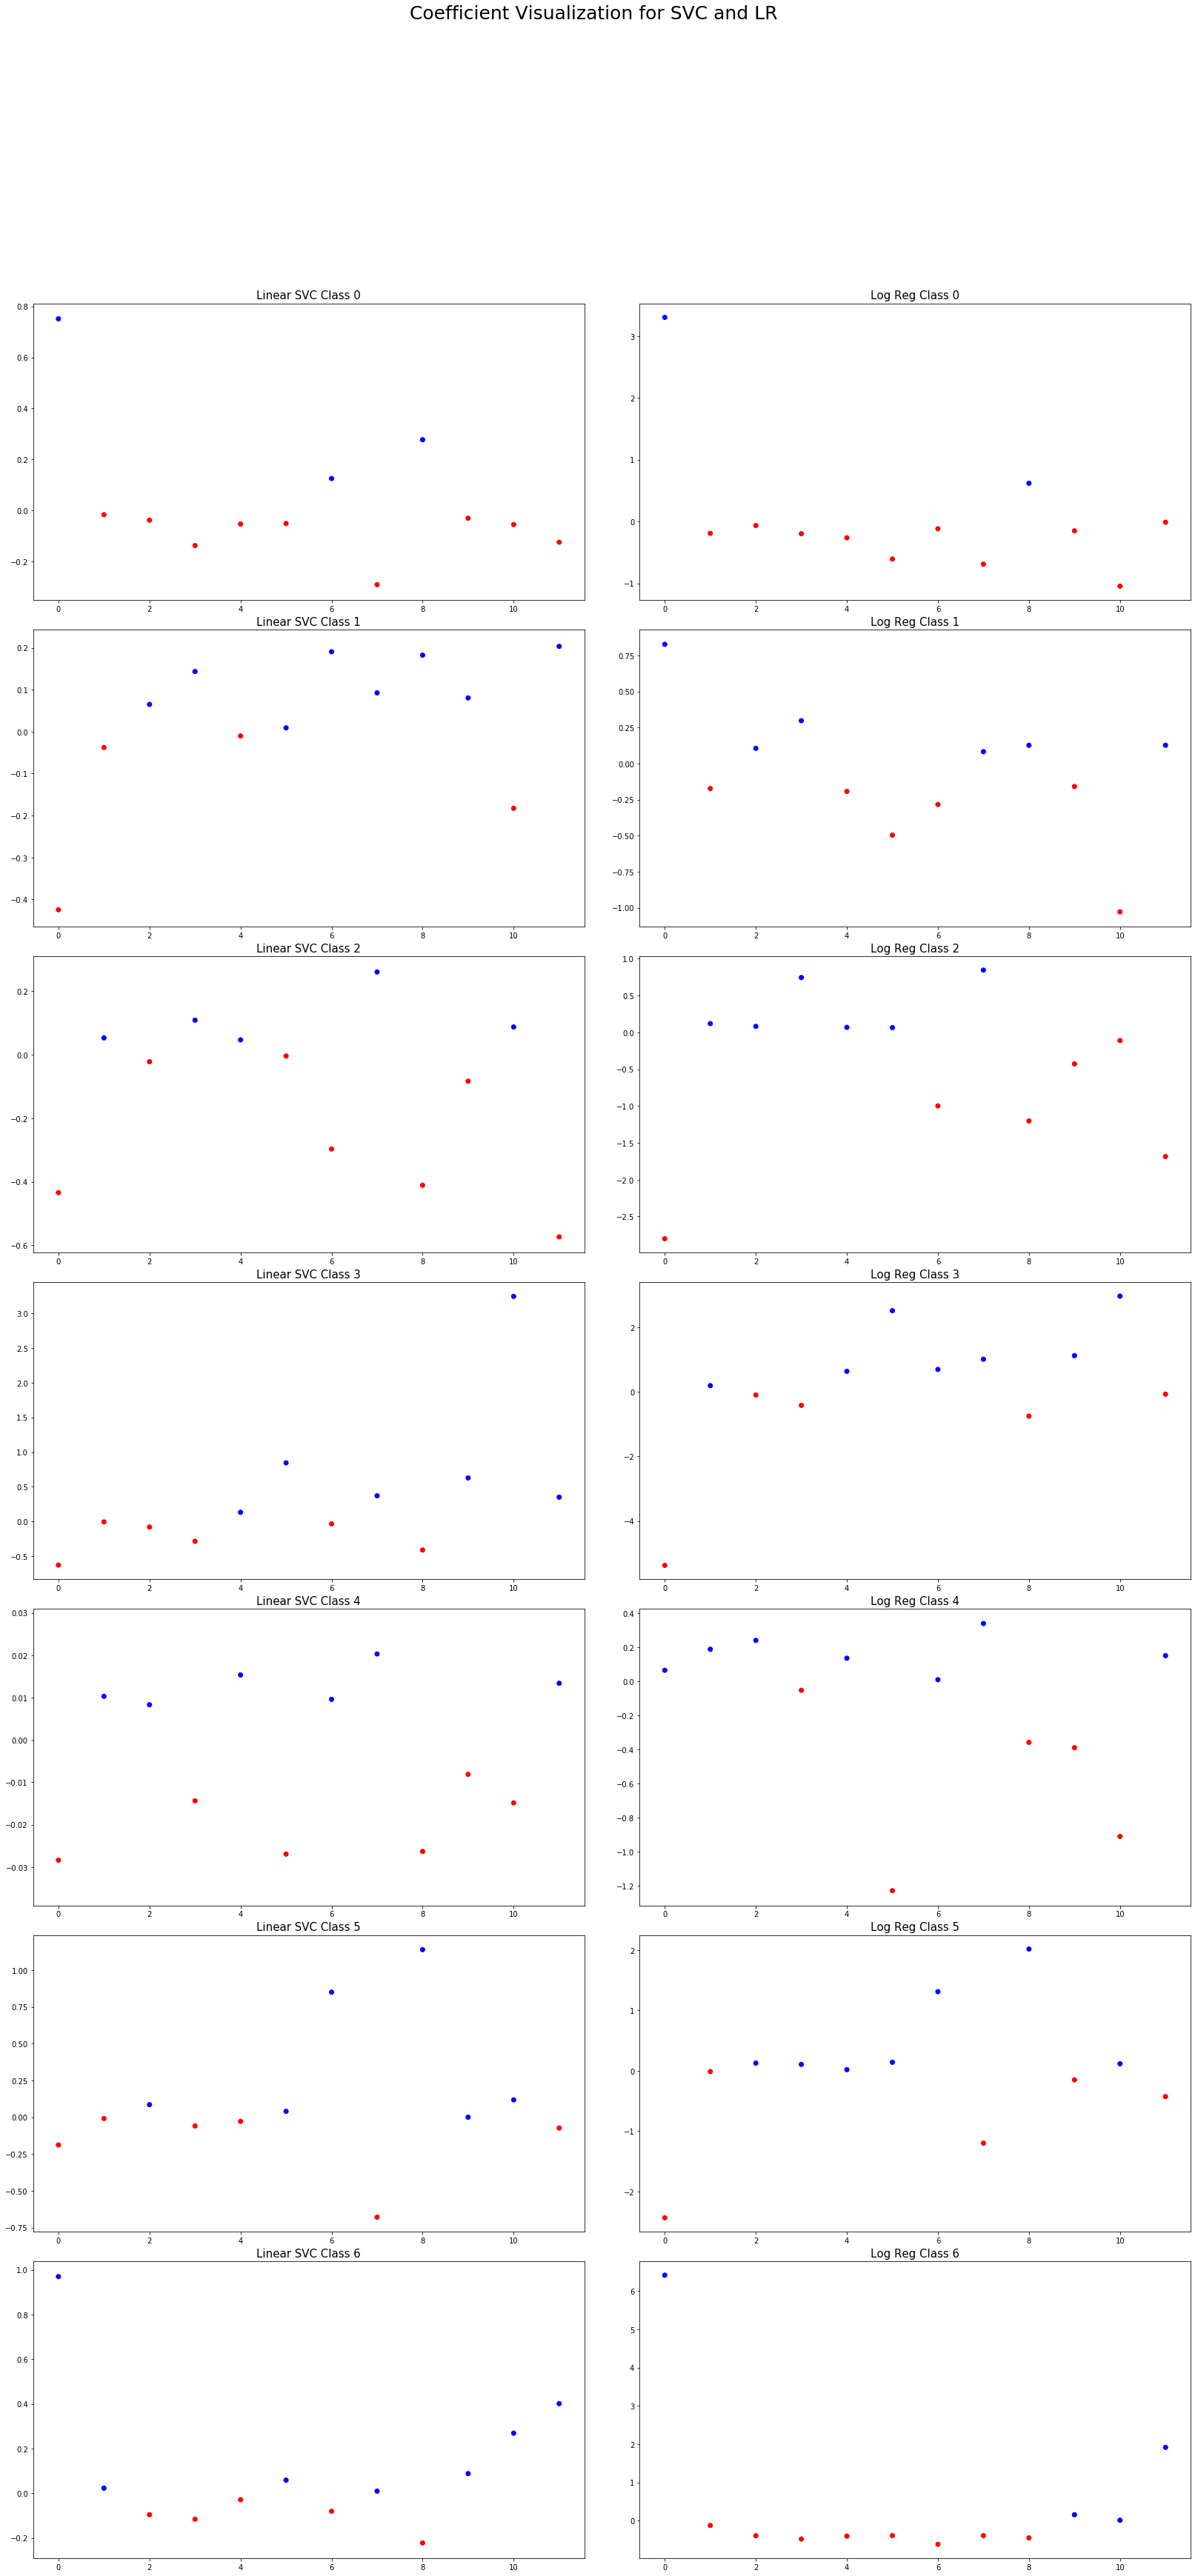

In [56]:
#Visualizing coefficients for Support Vector Machines and Logistic Regression
fig25, axes25 = plt.subplots(7,2)
fig25.set_size_inches(28,56)
fig25.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(7):
    axes25[i,0].scatter(range(X_train_scaled.shape[1]),grid_svc_k.best_estimator_.coef_[i],c=np.sign(grid_svc_k.best_estimator_.coef_[i]), cmap="bwr_r")
    axes25[i,0].set_title("Linear SVC Class %s" %str(i),fontsize=15)
    axes25[i,1].scatter(range(X_train_scaled.shape[1]),grid_log_k.best_estimator_.coef_[i],c=np.sign(grid_log_k.best_estimator_.coef_[i]), cmap="bwr_r")
    axes25[i,1].set_title("Log Reg Class %s" %str(i),fontsize=15)

fig25.suptitle('Coefficient Visualization for SVC and LR', fontsize=25)
fig25.savefig('task_25.png')